In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud # pip install wordcloud

%matplotlib inline  

%run 'DataSet.py'
%run 'Processing.py'

Play  ['Hamlet' 'Othello' 'Henry V' 'Timon of Athens' 'Measure for Measure'
 'Antony and Cleopatra' 'King Lear' 'King Edward III' 'Julius Caesar'
 'Macbeth' 'Titus Andronicus' "The Winter's Tale" 'Richard III'
 'As You Like It' 'Coriolanus' 'The Tempest' 'Henry IV Part 2'
 'Romeo and Juliet' 'Pericles' 'Henry IV Part 1' 'Cymbeline'
 'The Two Noble Kinsmen' "Love's Labour's Lost" 'The Taming of the Shrew'
 'The Merchant of Venice' 'Troilus and Cressida' 'King John'
 "All's Well That Ends Well" 'Richard II' 'Henry VIII'
 'The Two Gentlemen of Verona' 'The Merry Wives of Windsor'
 'Henry VI Part 3' 'Much Ado About Nothing' 'Henry VI Part 1'
 'Henry VI Part 2' 'Twelfth Night' 'The Comedy of Errors'
 "A Midsummer Night's Dream"]
[('I', 20056), ('And', 7099), ('thou', 4499), ('The', 3454), ('thy', 3453), ('shall', 3153), ('thee', 3078), ('To', 2988), ('That', 2719), ('But', 2390)]


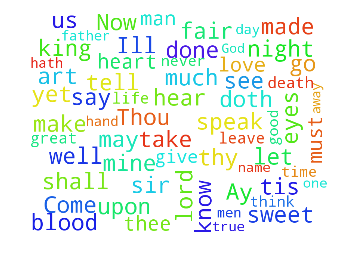

In [2]:
ds = DataSet()
ds.load()

tokens = Processing.get_tokens(ds.df['Utterance'], [Processing.remove_punctuation], [Processing.remove_stopwords])

allWordDist = nltk.FreqDist(tokens)

common_words = allWordDist.most_common(100)

# Print the top 10 words - shows some 'olde english' stop words
print(allWordDist.most_common(10))

words = ' '.join(entry[0] for entry in common_words)


# lower max_font_size
wordcloud = WordCloud(background_color='white', max_font_size=60,height=600, width=800).generate(words)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.savefig('wordcloud.png', dpi=200)

# POS Tagging

Part Of Speech (POS) tagging allows us to identify the structure of the sentence. This is particularly useful in removing proper nouns, such as people's names. For example, whenever we ranked the words earlier the word MacBeth scores quite highly in the play MacBeth. This doesn't give us a lot of information, so it may be useful to remove people's names. 

We use pos_tag from NLTK to remove the proper nouns ('NNP') from all the plays. Our results are disappionting: we do indeed remove macbeth, but would also remove countries such as Scotland, England, Ireland and other words that definately aren't proper nouns: show, began, which, speak, witch. Macbeth without witches would be a tragedy!

In [3]:
plays_utterances = ds.get_by_play()

In [4]:
# Strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
# Requires average_perceptron_tagger from NLTK download
from nltk.tag import pos_tag

for title, text in plays_utterances.items():
    tokens = nltk.word_tokenize(text)
    tagged = pos_tag(tokens) #use NLTK's part of speech tagger
    propernouns = [word for word,pos in tagged if pos == 'NNP' ]

    
    if( title == 'macbeth'):
        print('Play: Macbeth')
        print('Proper Nouns: ',propernouns)



Play: Macbeth
Proper Nouns:  ['Macbeth', 'Graymalkin', 'Paddock', 'Anon', 'Fair', 'Hover', 'Who', 'Hail', 'Say', 'Macdonwald', 'Do', 'Show', 'Macbeth', 'Disdaining', 'Which', 'Till', 'Which', 'Till', 'O', 'Discomfort', 'Mark', 'Scotland', 'Norweyan', 'Began', 'Dismay', 'Macbeth', 'Banquo', 'Or', 'Golgotha', 'Go', 'Ross', 'God', 'Whence', 'Fife', 'Norweyan', 'Norway', 'Cawdor', 'Till', 'Bellona', 'Point', 'Great', 'Sweno', 'Norways', 'Till', 'Saint', 'Colme', 'Cawdor', 'Macbeth', 'Macbeth', 'Sister', "'d", "'d", 'Aleppo', "Thou'rt", 'Hang', 'Shall', 'Wreck', 'Macbeth', 'Posters', 'Thus', 'Speak', 'Macbeth', 'Glamis', 'Macbeth', 'Cawdor', 'Macbeth', 'Are', 'ye', 'Which', 'Speak', 'Macbeth', 'Thou', 'Macbeth', 'Banquo', 'Banquo', 'Macbeth', 'Stay', 'Sinel', 'Glamis', 'Cawdor', 'Cawdor', 'A', 'Stands', 'No', 'Cawdor', 'Say', 'Speak', 'Cawdor', 'Macbeth', 'Thy', 'Which', 'Norweyan', 'Strange', 'As', 'Came', 'Thy', 'Cawdor', 'Cawdor', 'Who', 'Which', 'Norway', 'Glamis', 'Cawdor', 'Cawdor', '

In [5]:
sentence = "Michael Jackson likes to eat at McDonalds"
tagged_sent = pos_tag(tokens)
# [('Michael', 'NNP'), ('Jackson', 'NNP'), ('likes', 'VBZ'), ('to', 'TO'), ('eat', 'VB'), ('at', 'IN'), ('McDonalds', 'NNP')]

propernouns = [word for word,pos in tagged_sent if pos == 'NNP']
# ['Michael','Jackson', 'McDonalds']

In [6]:
print(propernouns)

['Good', 'Heigh', 'Blow', 'Nay', 'Cheerly', 'Stand', 'Fate', 'Bring', 'Shall', 'Hang', 'Lay', 'Dashes', 'O', 'Who', 'Dash', 'O', 'Against', 'Poor', 'Had', 'O', 'Art', 'Than', 'Prospero', 'Did', 'Lend', 'Wipe', 'So', 'Betid', 'Which', 'Sit', 'Begun', 'Obey', 'Canst', 'A', 'Out', 'Hath', 'Had', 'Thou', 'Miranda', 'How', 'Miranda', 'Thy', 'Duke', 'Milan', 'A', 'Sir', 'Thy', 'Was', 'Duke', 'Milan', 'Both', 'O', 'Which', 'Please', 'Antonio', 'Prospero', 'Thy', 'Dost', 'Sir', 'O', "O'er-prized", 'Dost', 'Absolute', 'Milan', 'Me', 'Was', 'King', 'Naples', 'Subject', 'Milan', 'Mark', 'King', 'Naples', 'Which', 'Should', 'Out', 'Milan', 'A', 'Antonio', 'Milan', 'Me', 'Alack', 'Will', 'Which', 'Were', 'Well', 'Dear', 'A', 'Bore', 'A', 'Nor', 'Instinctively', 'Did', 'Alack', 'O', 'Thou', 'Thou', "'d", 'Against', 'Providence', 'A', 'Neapolitan', 'Gonzalo', 'Out', 'Master', 'Which', 'Sit', 'Heavens', "'t", 'Know', 'Fortune', 'Brought', 'A', 'Will', 'Thou', 'Come', 'Ariel', 'Ariel', 'Hast', 'Perform

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem.snowball import SnowballStemmer




stemmer = SnowballStemmer("english")


def run_tfidf(words, stem=False):
    all_stopwords = stopwords.words('english') 

    #adding Shakespeare-ean stop-words
    shaksp_stopwords = ('thee', 'thou', 'thy', 'thine')
    all_stopwords += shaksp_stopwords

    tfidf_vectorizer = TfidfVectorizer(#max_features=200000,
                                        max_features=1000,
                                       min_df=0.2, 
                                       max_df=0.8, 
                                       stop_words=all_stopwords,
                                        use_idf=True, 
                                        tokenizer=tokenize_and_stem if stem else tokenize_only, 
                                        ngram_range=(1,3))

    tfidf_matrix = tfidf_vectorizer.fit_transform(words)
    
    return tfidf_matrix, tfidf_vectorizer.get_feature_names()


def strip_proppers_POS(tokens):
    tagged = pos_tag(tokens) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

    
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems



def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
            
    filtered_tokens = strip_proppers_POS(filtered_tokens)
    
    return filtered_tokens    
    


In [8]:


tfidf_matrix, terms = run_tfidf(plays_utterances.values())

# KMeans

In [30]:
from sklearn.cluster import KMeans
from collections import Counter
    
num_clusters = 3

km = KMeans(n_clusters=num_clusters,
            max_iter=1000,             # Default is 300
            n_init=50,                 # Default is 10
            precompute_distances=True, # Faster but takes more memory
            random_state=47,
            njobs=-1)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()



In [31]:

plays_dict = { 'title': list(plays_utterances.keys()),'cluster': clusters}

frame = pd.DataFrame(plays_dict, index = [clusters] , columns = [
        'title', 'cluster'])


In [32]:
frame['cluster'].value_counts()

0    22
1    10
2     5
Name: cluster, dtype: int64

In [33]:

totalvocab_stemmed = []
totalvocab_tokenized = []
for i in plays_utterances.values():
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)


In [34]:
print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(num_clusters):
    
    print("Cluster {} words:".format(i))
    for ind in order_centroids[i, :10]:
        print(' {}'.format(terms[ind]))
    print()
    
    print("Cluster {} titles:".format(i))
    for title in frame.ix[i]['title'].values.tolist():
        print(' {},'.format(title))
    print()
    print()

Top terms per cluster:

Cluster 0 words:
 duke
 signior
 gods
 letter
 'em
 prithee
 friar
 court
 ring
 count

Cluster 0 titles:
 much_ado,
 lear,
 two_gent,
 macbeth,
 all_well,
 taming,
 hen_viii,
 t_night,
 dream,
 lll,
 hamlet,
 r_and_j,
 troilus,
 othello,
 as_you,
 merchant,
 pericles,
 timon,
 com_err,
 m_for_m,
 win_tale,
 tempest,


Cluster 1 words:
 france
 john
 york
 henry
 england
 richard
 duke
 edward
 sir john
 harry

Cluster 1 titles:
 hen_v,
 rich_iii,
 rich_ii,
 m_wives,
 hen_vi_1,
 hen_iv_2,
 hen_iv_1,
 john,
 hen_vi_2,
 hen_vi_3,


Cluster 2 words:
 rome
 caesar
 gods
 brutus
 roman
 emperor
 caesar 's
 sons
 voices
 court

Cluster 2 titles:
 j_caesar,
 coriolan,
 cymbelin,
 a_and_c,
 titus,




In [35]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [36]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: '0', 
                 1: '1', 
                 2: '2', 
                 3: '3', 
                 4: '4'}

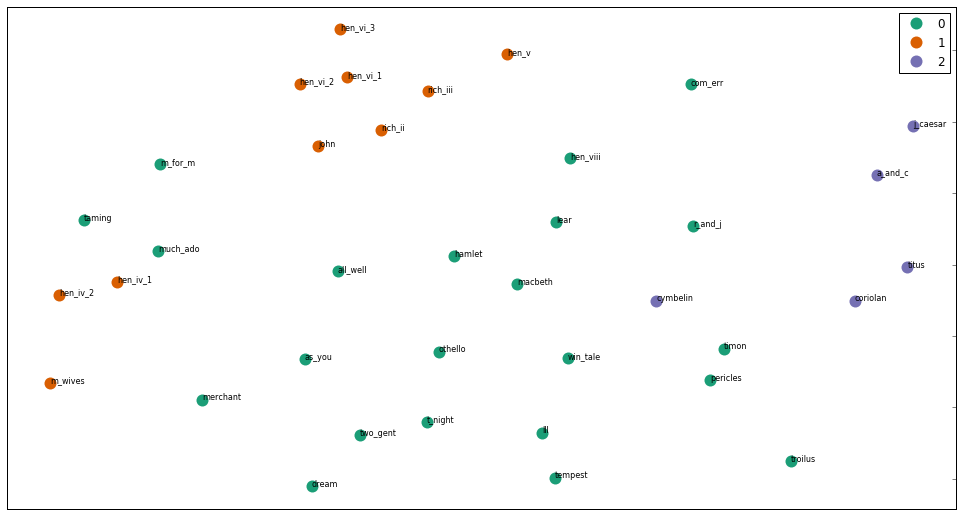

In [37]:
%matplotlib inline

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=frame['cluster'], title=frame['title'])) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that we use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i, row in df.iterrows():
    ax.text(row['x'], row['y'], row['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

# Hierarchical Document Clustering

In [38]:
print(dist)

[[ -4.44089210e-16   9.63323395e-01   8.13867576e-01 ...,   6.74999313e-01
    7.77041928e-01   8.53021550e-01]
 [  9.63323395e-01   0.00000000e+00   9.36764962e-01 ...,   9.47101023e-01
    9.41289227e-01   9.58168239e-01]
 [  8.13867576e-01   9.36764962e-01   4.44089210e-16 ...,   6.99440971e-01
    5.98588140e-01   6.97766445e-01]
 ..., 
 [  6.74999313e-01   9.47101023e-01   6.99440971e-01 ...,  -1.77635684e-15
    7.21380258e-01   7.90434609e-01]
 [  7.77041928e-01   9.41289227e-01   5.98588140e-01 ...,   7.21380258e-01
    1.11022302e-16   6.37280874e-01]
 [  8.53021550e-01   9.58168239e-01   6.97766445e-01 ...,   7.90434609e-01
    6.37280874e-01   2.22044605e-16]]


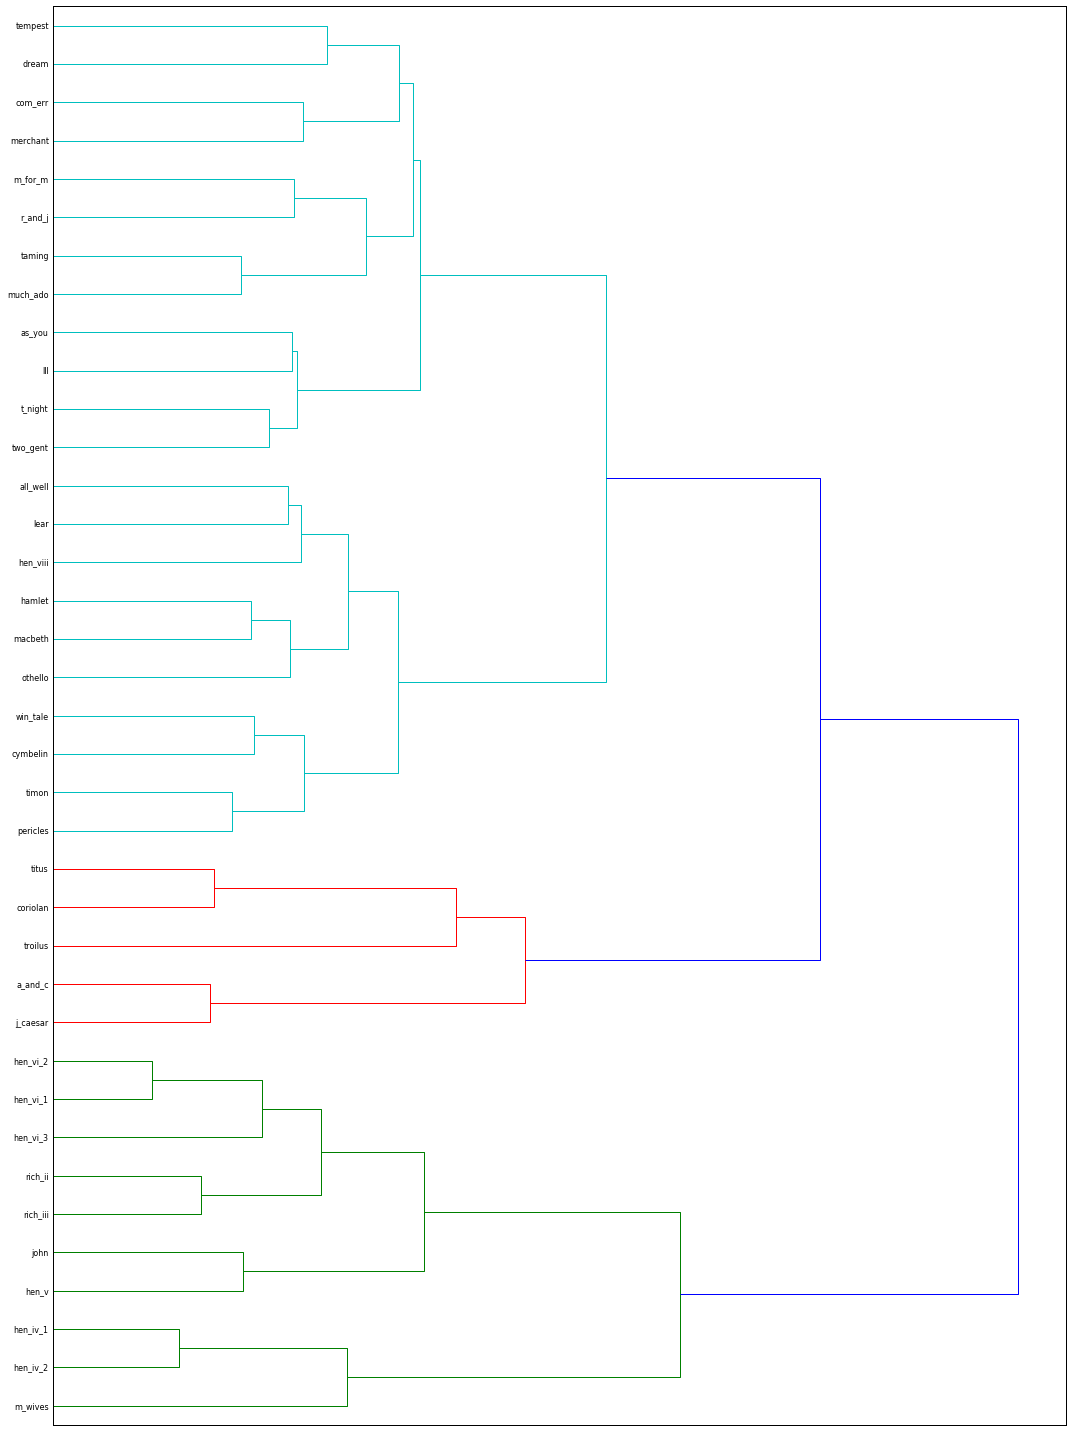

In [39]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=list(frame.title));

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

# Self Organising Map

# Silhouette Plots

# Purity Measures, Contingenct Tables, Entropy